In [11]:
# Standard Imports
import numpy as np
import matplotlib.pyplot as plt
import csv, datetime, random, sys
import matplotlib.dates as mdates
import pandas as pd

def MakeDataFromTxt(filepath):
    """
    Helper function to parse text files in IFM proprietary format.
    """
    with open(filepath, 'r') as file:
        reader = csv.reader(file)

        db = dict()                          # Dictionary that will hold k,v pairs of 
        recent_EPC = ''                      # The most recent EPC that was read, and data is being assigned to
        Time_Or_Data = True                  # Time is true, Data is false
        reached_24 = False

        for l in reader:                     # Iterate over entire text file
            line = l[0]                      # Each line only has one token, so we select it
            
            if len(line)==24:                # If it is an EPC
                db[line] = [[],[]]           # Create new k,v pair in database
                recent_EPC = line            # Current EPC to add to is selected
            
            elif line == '[':                # If start bracket, beginning to collect an array of data
                data = []

            elif line == ']':                # End bracket means end of data array
                if len(data)!=0:
                    if Time_Or_Data:
                        db[recent_EPC][0] = data
                        Time_Or_Data = False
                    else:
                        db[recent_EPC][1] = data
                        Time_Or_Data = True
                data = []

            elif len(line)==8:               # If it is a time stamp
                h,m,s = line.split(':')      # Parse timestamp into hours, minutes, seconds

                if int(h)==23:
                    reached_24 = True        # If end of day reached, must move to Day 2

                if reached_24 and int(h) < 12:
                    day=2
                else:
                    day=1

                data.append(datetime.datetime(1970, 2, day, int(h), int(m), int(s))) # Minus 3 for Pacific Time
            
            elif line ==' ':               # If blank space, then we skip to parse next line
                pass

            else:                          # If it is a data point
                try:
                    data.append(float(line))
                except:
                    pass                   # Error catching case just in case, so annoying errors don't crash program
    return db

In [12]:
t1 = MakeDataFromTxt('tags_oven.txt')

# Combine all data into one dictionary
combined = dict()
for d in [ t1, ]:
    for k,v in d.items():
        if k in combined:                                 # if tag is already in dict
            for i in range(len(v[0])):                    # iterate over all time points
                if v[0][i] in combined[k]:                # if time point is already in dict
                    combined[k][v[0][i]].append(v[1][i])
                else:                                     # if time point is not in dict
                    combined[k][v[0][i]] = [v[1][i]]
        else:             # if tag is not in dict
            combined[k] = dict()
            for i in range(len(v[0])):
                combined[k][v[0][i]] = [v[1][i]]
for k,v in combined.items():
    for k2,v2 in v.items():
        combined[k][k2] = sum(v2)/len(v2) # avg all points taken during the same second

In [13]:
shirt1 = [ "61DF", "2BC6", "427A", "0F7D", "8099", "759A", "9A80", "7198", "94B4", "988C", "80D2", "79D3", "8265", "896D", "7852", "4E7A" ];
shirt2 = [ "B57A", "088C", "8853", "5471", "3DBA", "0709", "9E3B", "8F77", "6065", "5782", "9B7D", "0A4A", "A831", "813D", "077C", "A035" ];

shirt3 = [ "1591", "8C56", "66C9", "1364", "6D2E", "0B61", "1E72", "1B7E", "5C34", "2371", "5E8F", "3DCF", "92C1", "265C", "7181", "2774" ];
# shirt3 = [ "1591", "8C56", "66C9", "1364", "6D2E", "0B61", "1B7E", "5C34", "2371", "5E8F", "3DCF", "92C1", "265C", "7181", "2774" ];

shirt4 = [ "6FD7", "62CA", "A73D", "056D", "4743", "6ACF", "37BB", "1650", "2CC8", "5713", "7EB3", "2C98", "3150", "424E", "4FDC", "B0A2" ];
shirt5 = [ "0086", "3644", "1E9E", "3325", "099B", "5577", "2D1C", "5352", "855B", "3B75", "1CBB", "7CD4", "2A7A", "3C47", "8E8D", "9941" ];
shirt6 = [ "B4A6", "138F", "41C1", "6A9E", "AB82", "98C0", "067B", "734B", "41AC", "1C2E", "8938", "B142", "A38C", "8FA4", "7BDA", "8917" ];
shirt7 = [ "9353", "7E20", "2E4F", "60D1", "7B06", "4EE3", "3318", "6415", "0D7C", "1EB3", "8A72", "2D69", "1F90", "77DE", "2850", "9F6B" ];
shirt8 = [ "277D", "77B5", "0859", "431C", "3869", "833E", "774F", "2B4F", "64A5", "483D", "0E92", "AC75", "675C", "737F", "2567", "B76E" ];

shirts = [ shirt1, shirt2, shirt3, shirt4, shirt5, shirt6, shirt7, shirt8 ]

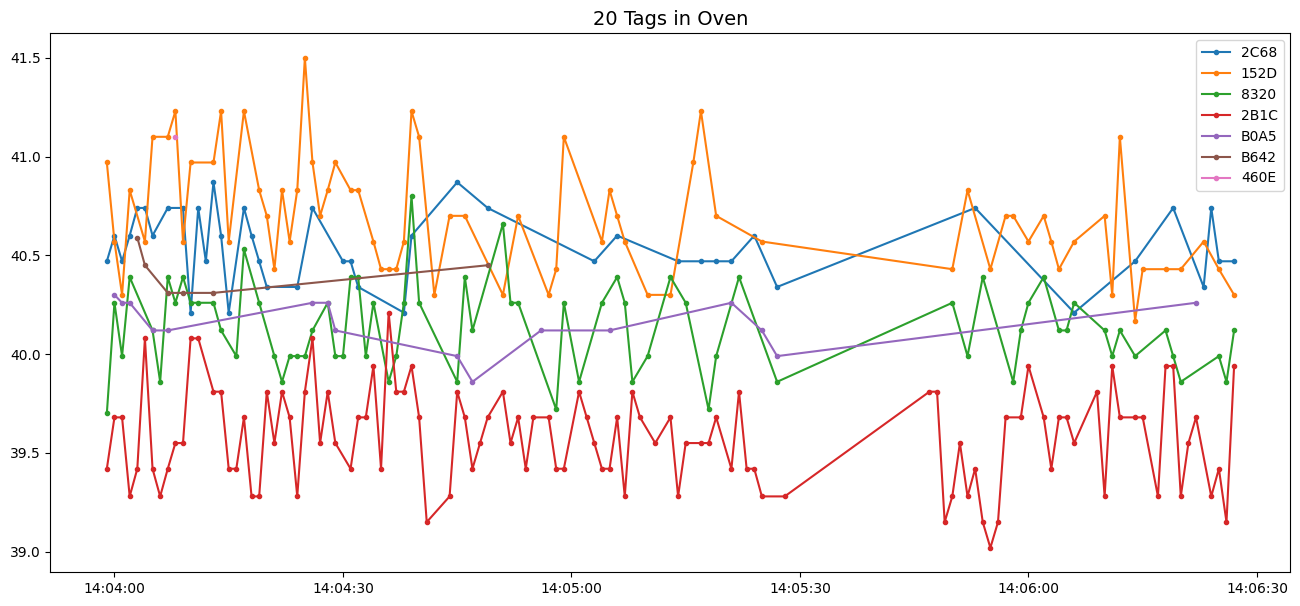

In [17]:
shirtsss = [
    "460E",
    "710D",
    "135C",
    "B642",
    "8320",
    "2C68",
    '7566',
    "9D1F",
    "152D",
    "88A5",
    '2B1C',
    '4A59',
    '897D',
    'B0A5',
    '87B4',
    '0F4B',
    '44CD',
    '362B',
    '3C35',
    '828F',
]

fig, ax1 = plt.subplots(1, 1, figsize=(16, 7), sharex=True)

for k,v in combined.items():
    if k[-4:] in shirtsss:
        s = sorted( v.items() )
        time, data = [ j[0] for j in s ], [ j[1] for j in s ]
        
        ax1.plot(time, data, label=k[-4:], marker=".")

ax1.set_title('20 Tags in Oven', fontsize=14)
ax1.legend()

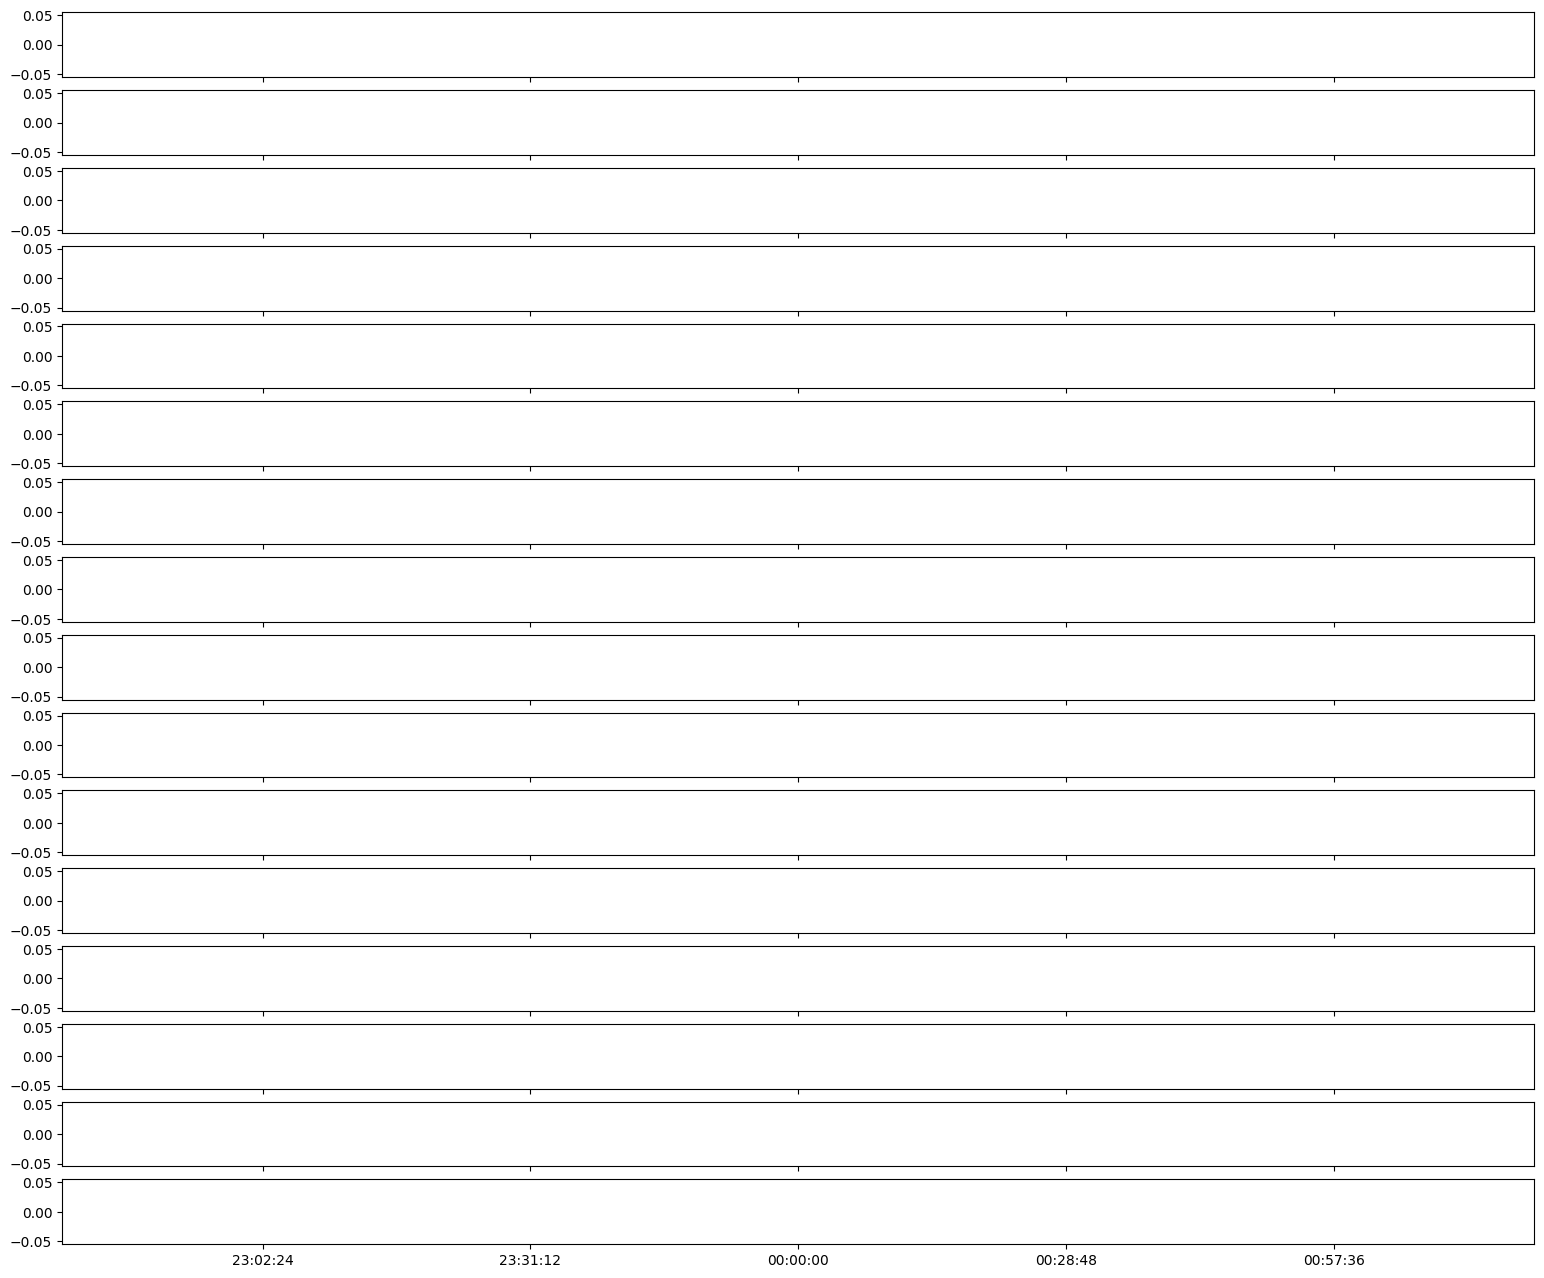

In [15]:
fig, (
    ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16
) = plt.subplots(16, 1, figsize=(19, 16), sharex=True)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax7.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax8.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax9.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax10.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax11.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax12.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax13.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax14.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax15.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax16.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

alist = [ ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16 ]
axes = {
    "1591" : ax1,
    "8C56" : ax2,
    "66C9" : ax3,
    "1364" : ax4,
    "6D2E"  : ax5,
    "0B61" : ax6,
    "1E72" : ax7,
    "1B7E" : ax8,
    "5C34" : ax9,
    "2371" : ax10,
    "5E8F" : ax11,
    "3DCF" : ax12,
    "92C1" : ax13,
    "265C" : ax14,
    "7181" : ax15,
    "2774": ax16
}
color = {
    "1591" : "#028599",
    "8C56" : "#ff3baa",
    "66C9" : "#8ad620",
    "1364" : "orange",
    "6D2E" : "green",
    "0B61" : "purple",
    "1E72" : "red",
    "1B7E" : "pink",
    "5C34" : "cyan",
    "2371" : "#d10092",
    "5E8F" : "brown",
    "3DCF" : "black",
    "92C1" : "blue",
    "265C" : "magenta",
    "7181" : "grey",
    "2774": "lime"
}



ts = [ datetime.datetime(1970, 2, 1, 17, 25, 15) + datetime.timedelta(seconds=3*i) for i in range(35) ]

for shirtEPC in shirt3:
    time_avg = []
    data_avg = []
    for i in range( len(ts) - 1 ):
        for k,v in combined.items():
            if k[-4:]==shirtEPC:
                s = sorted( v.items() )
                y = [j[1] for j in s if j[0] > ts[i] and j[0] < ts[i+1]]
                time_avg.append( ts[i] )
                data_avg.append( np.mean(y) )
        axes[shirtEPC].plot( time_avg, data_avg, linewidth=0.9, color=color[shirtEPC], linestyle='dashed', marker="." )
    
    # print(round(np.nanstd(data_avg),3), shirtEPC)

count = 0
for k,v in combined.items():
    if k[-4:] in shirt3:
        s = sorted( v.items() )
        time, data = [ j[0] for j in s ], [ j[1] for j in s ]
        axes[k[-4:]].plot( time, data, linewidth=0.9, color=color[k[-4:]])
        count += 1
        axes[k[-4:]].set_ylabel(k[-4:], fontsize=15)
        print(round(np.std(data),3) , k[-4:])

        
# for a in alist:
#     a.legend()
#     # handles, labels = plt.gca().get_legend_handles_labels()
# # by_label = dict(zip(labels, handles))
# # ax1.legend( by_label.values(), by_label.keys() )

# ax1.set_title("Tag Readings", fontsize=15)
# ax1.set_xlabel("Time", fontsize=15)
# ax1.set_ylabel("Temp (C)", fontsize=15)

# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# ax1.legend( by_label.values(), by_label.keys() )